Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 3s - loss: 60.3984 - 3s/epoch - 513ms/step
Epoch 2/100
5/5 - 0s - loss: 42.6985 - 15ms/epoch - 3ms/step
Epoch 3/100
5/5 - 0s - loss: 37.2841 - 18ms/epoch - 4ms/step
Epoch 4/100
5/5 - 0s - loss: 34.7913 - 15ms/epoch - 3ms/step
Epoch 5/100
5/5 - 0s - loss: 32.7892 - 21ms/epoch - 4ms/step
Epoch 6/100
5/5 - 0s - loss: 31.5817 - 28ms/epoch - 6ms/step
Epoch 7/100
5/5 - 0s - loss: 28.5499 - 20ms/epoch - 4ms/step
Epoch 8/100
5/5 - 0s - loss: 28.2827 - 15ms/epoch - 3ms/step
Epoch 9/100
5/5 - 0s - loss: 24.9384 - 32ms/epoch - 6ms/step
Epoch 10/100
5/5 - 0s - loss: 23.6436 - 1

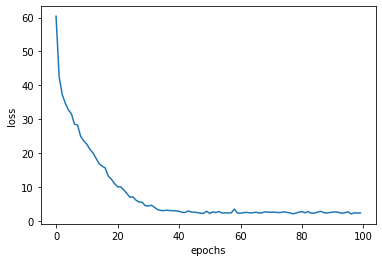

1/1 [==============================] - 0s 90ms/step


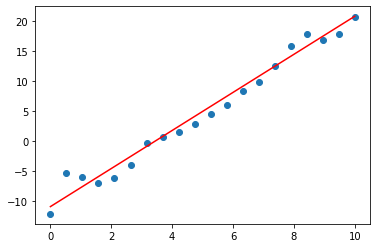

In [ ]:
#1201 단순 선형 회귀: model = tf.keras.Sequential()
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

##def dataset(train_size=100): # numpy
##     np.random.seed(1)
##     x = np.linspace(0.0, 10.0, num=train_size)
####     y = x**3 + x**2 + x + 4.0
##     y = 3.0*x - 10.0
####     y+= np.random.randn(train_size)*2.0
##     y += np.random.normal(loc=0.0, scale=2.0, size=train_size)
##     return x, y

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(0.0, 10.0, num=train_size)
##     y = x**3 + x**2 + x + 4.0
     y = 3.0*x - 10.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 2.0)
     return x, y
x, y_true = dataset(20)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))
##model.add(tf.keras.layers.Dense(units=1, input_shape=(1,))) # [1]
##model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=(1,))])
model.summary()

##opt = tf.keras.optimizers.SGD(learning_rate=0.01)
##opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse') # 'mean_squared_error'
##model.compile(optimizer='sgd', loss='mse') # 'sgd', 'adam', 'rmsprop'

# 0: silent, 1:progress bar,  2: one line per epoch 
ret = model.fit(x, y_true, epochs=100, batch_size=4, verbose=2)
print("len(model.layers):", len(model.layers)) # 1

loss = ret.history['loss']
print("loss:", loss[-1])
#print(model.get_weights())  # weights, bias
print("weights:", model.layers[0].weights[0].numpy())
print("bias:", model.layers[0].weights[1].numpy()) # model.layers[0].bias.numpy()

plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.scatter(x, y_true)
y_pred = model.predict(x)
plt.plot(x, y_pred, color='red')
plt.show()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
2/2 - 0s - loss: 11.2543 - 217ms/epoch - 109ms/step
Epoch 2/100
2/2 - 0s - loss: 3.1771 - 10ms/epoch - 5ms/step
Epoch 3/100
2/2 - 0s - loss: 1.5976 - 6ms/epoch - 3ms/step
Epoch 4/100
2/2 - 0s - loss: 1.2144 - 7ms/epoch - 4ms/step
Epoch 5/100
2/2 - 0s - loss: 1.0431 - 7ms/epoch - 3ms/step
Epoch 6/100
2/2 - 0s - loss: 1.0194 - 7ms/epoch - 3ms/step
Epoch 7/100
2/2 - 0s - loss: 0.8776 - 6ms/epoch - 3ms/step
Epoch 8/100
2/2 - 0s - loss: 0.7996 - 6ms/epoch - 3ms/step
Epoch 9/100
2/2 - 0s - loss: 0.7098 - 7ms/epoch - 3ms/step
Epoch 10/100
2/2 - 0s - loss: 0.6367 - 8ms/epoch - 

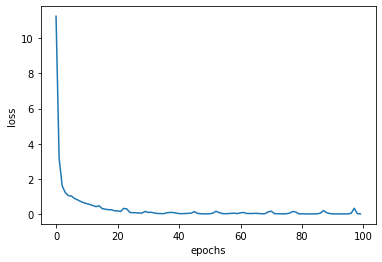

In [ ]:
#1202
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

train_data = np.array([ # t = 1*x0 + 2*x1 + 3
#  x0, x1, t      
 [ 1,  0,  4],
 [ 2,  0,  5],
 [ 3,  0,  6],
 [ 4,  0,  7],
 [ 1,  1,  6],
 [ 2,  1,  7],
 [ 3,  1,  8],
 [ 4,  1,  9]], dtype=np.float32)

X      = train_data[:, :-1]
y_true = train_data[:, -1:]  # t
##y_true += np.reshape(np.random.randn(len(y_true))*2.0, (-1, 1)) 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=2)) # input_shape=(2,)
model.summary()

##opt = tf.keras.optimizers.SGD(learning_rate=0.01)
##opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse') # 'mean_squared_error'
##model.compile(optimizer='sgd', loss='mse') # 'sgd', 'adam', 'rmsprop'

# 0: silent, 1:progress bar,  2: one line per epoch 
ret = model.fit(X, y_true, epochs=100, batch_size=4, verbose=2)
y_pred = model.predict(X)
print("y_pred:", y_pred)
print("len(model.layers):", len(model.layers)) # 1

loss = ret.history['loss']
print("loss:", loss[-1])
#print(model.get_weights())
print("weights:", model.layers[0].weights[0].numpy())
print("bias:", model.layers[0].weights[1].numpy()) # model.layers[0].bias.numpy()

plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 - 0s - loss: 14056.0576 - 225ms/epoch - 225ms/step
Epoch 2/100
1/1 - 0s - loss: 10069.9746 - 6ms/epoch - 6ms/step
Epoch 3/100
1/1 - 0s - loss: 7810.0078 - 5ms/epoch - 5ms/step
Epoch 4/100
1/1 - 0s - loss: 6247.4556 - 5ms/epoch - 5ms/step
Epoch 5/100
1/1 - 0s - loss: 5080.2646 - 5ms/epoch - 5ms/step
Epoch 6/100
1/1 - 0s - loss: 4173.0161 - 7ms/epoch - 7ms/step
Epoch 7/100
1/1 - 0s - loss: 3451.5513 - 13ms/epoch - 13ms/step
Epoch 8/100
1/1 - 0s - loss: 2870.0508 - 6ms/epoch - 6ms/step
Epoch 9/100
1/1 - 0s - loss: 2397.7820 - 7ms/epoch - 7ms/step
Epoch 10/100
1/1 - 0s 

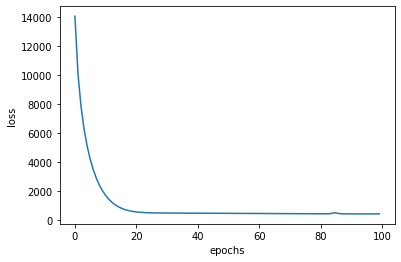

1/1 [==============================] - 0s 27ms/step


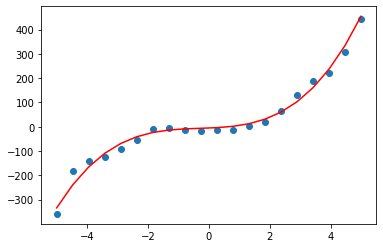

In [ ]:
#1203
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(-5.0, 5.0, num=train_size)
     y = 3.0*x**3 + 2.0*x**2 + x + 4.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 30.0)
     return x, y
x, y_true = dataset(20)
##x /= max(x)       # 정규화
##y_true /= max(y_true)

# n-차 다항식 회귀
n = 3
X = np.ones(shape = (len(x), n+1), dtype=np.float32)
##X[:, 0] = 1.0
##X[:, 1] = x
##X[:, 2] = x**2
##X[:, 3] = x**3
for i in range(1, n+1):
     X[:, i] = x**i

model=tf.keras.Sequential(
        [tf.keras.layers.Dense(units=1, use_bias=False,input_shape=(n+1,))])
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse')
ret = model.fit(X, y_true, epochs=100, verbose=2)
print("len(model.layers):", len(model.layers)) # 1

loss = ret.history['loss']
print("loss:", loss[-1])
#print(model.get_weights())  # weights
print("weights:", model.layers[0].weights[0].numpy())

plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.scatter(x, y_true) 
y_pred = model.predict(X)
plt.plot(x, y_pred, color='red')
plt.show()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 0s - loss: 60.3984 - 229ms/epoch - 46ms/step
Epoch 2/100
5/5 - 0s - loss: 42.6985 - 12ms/epoch - 2ms/step
Epoch 3/100
5/5 - 0s - loss: 37.2841 - 11ms/epoch - 2ms/step
Epoch 4/100
5/5 - 0s - loss: 34.7913 - 11ms/epoch - 2ms/step
Epoch 5/100
5/5 - 0s - loss: 32.7892 - 11ms/epoch - 2ms/step
Epoch 6/100
5/5 - 0s - loss: 31.5817 - 11ms/epoch - 2ms/step
Epoch 7/100
5/5 - 0s - loss: 28.5499 - 10ms/epoch - 2ms/step
Epoch 8/100
5/5 - 0s - loss: 28.28

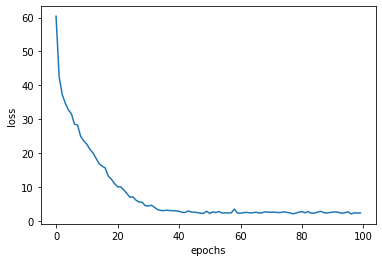

1/1 [==============================] - 0s 30ms/step


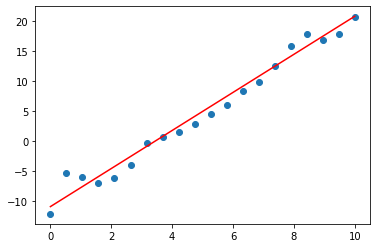

In [ ]:
#1301
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(0.0, 10.0, num=train_size)
     y = 3.0*x - 10.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 2.0)
     return x, y
x, y_true = dataset(20)

inputs = tf.keras.layers.Input(shape=(1,))
##y = tf.keras.layers.Dense(units=1)  # ,input_shape=(1,))
##outputs = y(inputs)
outputs = tf.keras.layers.Dense(units=1)(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

##opt = tf.keras.optimizers.SGD(learning_rate=0.01)  # optimizer='sgd'
##opt = tf.keras.optimizers.Adam(learning_rate=0.01) # 'adam'
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1) # 'rmsprop'
model.compile(optimizer=opt, loss='mse') # 'mean_squared_error'

ret = model.fit(x, y_true, epochs=100, batch_size=4, verbose=2) #2: one line per epoch 
print("len(model.layers):", len(model.layers)) # 2

loss = ret.history['loss']
print("loss:", loss[-1])
#print(model.get_weights())  # weights, bias
print("weights:", model.layers[1].weights[0].numpy())
print("bias:", model.layers[1].weights[1].numpy()) # model.layers[1].bias.numpy()

plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.scatter(x, y_true)
y_pred = model.predict(x)
plt.plot(x, y_pred, color='red')
plt.show()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
2/2 - 0s - loss: 11.2543 - 223ms/epoch - 111ms/step
Epoch 2/100
2/2 - 0s - loss: 3.1771 - 10ms/epoch - 5ms/step
Epoch 3/100
2/2 - 0s - loss: 1.5976 - 7ms/epoch - 3ms/step
Epoch 4/100
2/2 - 0s - loss: 1.2144 - 7ms/epoch - 3ms/step
Epoch 5/100
2/2 - 0s - loss: 1.0431 - 8ms/epoch - 4ms/step
Epoch 6/100
2/2 - 0s - loss: 1.0194 - 6ms/epoch - 3ms/step
Epoch 7/100
2/2 - 0s - loss: 0.8776 - 7ms/epoch - 3ms/step
Epoch 8/100
2/2 - 0s - loss: 0.7996 - 6ms/

1/1 [==============================] - 0s 33ms/step
y_pred: [[3.9658604]
 [4.9696636]
 [5.9734664]
 [6.977269 ]
 [5.954734 ]
 [6.9585366]
 [7.9623394]
 [8.966143 ]]
len(model.layers): 2
loss: 0.002015576930716634
weights: [[1.0038029]
 [1.9888731]]
bias: [2.9620576]


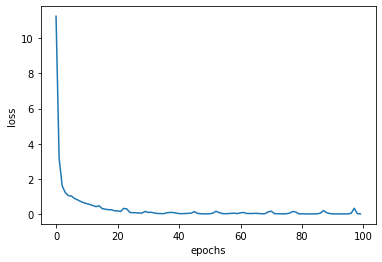

In [ ]:
#1302
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

train_data = np.array([ # t = 1*x0 + 2*x1 + 3
#  x0, x1, t      
 [ 1,  0,  4],
 [ 2,  0,  5],
 [ 3,  0,  6],
 [ 4,  0,  7],
 [ 1,  1,  6],
 [ 2,  1,  7],
 [ 3,  1,  8],
 [ 4,  1,  9]], dtype=np.float32)

X      = train_data[:, :-1]
y_true = train_data[:, -1:]  # t
##y_true += np.reshape(np.random.randn(len(y_true))*2.0, (-1, 1)) 

inputs = tf.keras.layers.Input(shape=(2,))
##y = tf.keras.layers.Dense(units=1)  # ,input_shape=(2,))
##outputs = y(inputs)
outputs = tf.keras.layers.Dense(units=1)(inputs)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

##opt = tf.keras.optimizers.SGD(learning_rate=0.01)  # optimizer='sgd'
##opt = tf.keras.optimizers.Adam(learning_rate=0.01) # 'adam'
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1) # 'rmsprop'
model.compile(optimizer=opt, loss='mse') # 'mean_squared_error'

ret = model.fit(X, y_true, epochs=100, batch_size=4, verbose=2) # 2: one line per epoch
y_pred = model.predict(X)
print("y_pred:", y_pred)
print("len(model.layers):", len(model.layers)) # 2

loss = ret.history['loss']
print("loss:", loss[-1])
#print(model.get_weights())
print("weights:", model.layers[1].weights[0].numpy())
print("bias:", model.layers[1].weights[1].numpy()) # model.layers[1].bias.numpy()

plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 - 0s - loss: 14056.0576 - 409ms/epoch - 409ms/step
Epoch 2/100
1/1 - 0s - loss: 10069.9746 - 12ms/epoch - 12ms/step
Epoch 3/100
1/1 - 0s - loss: 7810.0078 - 6ms/epoch - 6ms/step
Epoch 4/100
1/1 - 0s - loss: 6247.4556 - 8ms/epoch - 8ms/step
Epoch 5/100
1/1 - 0s - loss: 5080.2646 - 7ms/epoch - 7ms/step
Epoch 6/100
1/1 - 0s - loss: 4173.0161 - 8ms/epoch - 8ms/step
Epoch 7/100
1/1 - 0s - loss: 3451.5513 - 8ms/epoch - 8ms/step
Epoch 8/100
1/1 - 0

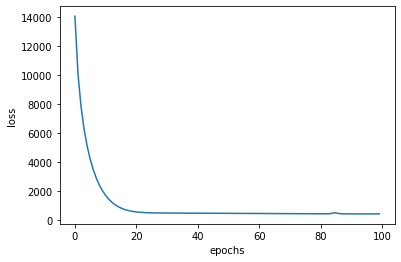

1/1 [==============================] - 0s 27ms/step


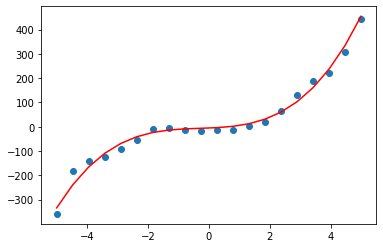

In [ ]:
#1303
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(-5.0, 5.0, num=train_size)
     y = 3.0*x**3 + 2.0*x**2 + x + 4.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 30.0)
     return x, y
x, y_true = dataset(20)
##x /= max(x)       # 정규화
##y_true /= max(y_true)

# n-차 다항식 회귀
n = 3
X = np.ones(shape = (len(x), n+1), dtype=np.float32)
##X[:, 0] = 1.0
##X[:, 1] = x
##X[:, 2] = x**2
##X[:, 3] = x**3
for i in range(1, n+1):
     X[:, i] = x**i

inputs = tf.keras.layers.Input(shape=(n+1,))
outputs = tf.keras.layers.Dense(units=1, use_bias=False)(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse')
ret = model.fit(X, y_true, epochs=100, verbose=2)
print("len(model.layers):", len(model.layers)) # 2

loss = ret.history['loss']
print("loss:", loss[-1])
#print(model.get_weights())  # weights
print("weights:", model.layers[1].weights[0].numpy())

plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.scatter(x, y_true) 
y_pred = model.predict(X)
plt.plot(x, y_pred, color='red')
plt.show()


In [7]:
#1401
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(-5.0, 5.0, num=train_size)
     y = 3.0*x**3 + 2.0*x**2 + x + 4.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 30.0)
     return x, y

x, y_true = dataset(20)

# n-차 다항식 회귀
n = 3
X = np.ones(shape = (len(x), n+1), dtype=np.float32)
for i in range(1, n+1):
     X[:, i] = x**i

inputs = tf.keras.layers.Input(shape=(n+1,))
outputs = tf.keras.layers.Dense(units=1, use_bias=False)(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse')
ret = model.fit(X, y_true, epochs=100, verbose=2)

#1: 모델 전체 저장
import os
if not os.path.exists("./RES"):
     os.mkdir("./RES")
model.save("./RES/1401.h5")   # HDF5, keras format

#2: 모델 구조 저장
json_string = model.to_json()
import json
file = open("./RES/1401.model", 'w')
json.dump(json_string, file)
file.close()
 
#3: 가중치 저장
model.save_weights("./RES/weights/1401")
 
#4: 학습중에 체크포인트 저장
filepath = "RES/ckpt/1401-{epoch:04d}.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(
              filepath, verbose=0, save_weights_only=True, save_freq=50)
ret = model.fit(X, y_true, epochs=100, callbacks = [cp_callback], verbose=0)


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 - 0s - loss: 14056.0576 - 264ms/epoch - 264ms/step
Epoch 2/100
1/1 - 0s - loss: 10069.9746 - 7ms/epoch - 7ms/step
Epoch 3/100
1/1 - 0s - loss: 7810.0078 - 7ms/epoch - 7ms/step
Epoch 4/100
1/1 - 0s - loss: 6247.4556 - 6ms/epoch - 6ms/step
Epoch 5/100
1/1 - 0s - loss: 5080.2646 - 7ms/epoch - 7ms/step
Epoch 6/100
1/1 - 0s - loss: 4173.0161 - 5ms/epoch - 5ms/step
Epoch 7/100
1/1 - 0s - loss: 3451.5513 - 6ms/epoch - 6ms/step
Epoch 8/100
1/1 - 0s 

loss: 445.20428466796875
len(model.layers): 2
weights: [[-5.12225  ]
 [ 4.75465  ]
 [ 2.6249003]
 [ 2.967898 ]]
1/1 [==============================] - 0s 27ms/step


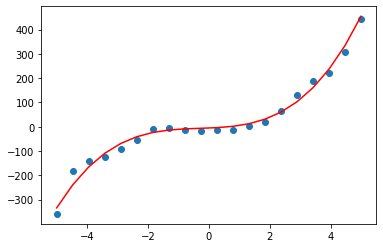

In [8]:
#1402
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(-5.0, 5.0, num=train_size)
     y = 3.0*x**3 + 2.0*x**2 + x + 4.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 30.0)
     return x, y
x, y_true = dataset(20)

# n-차 다항식 회귀
n = 3
X = np.ones(shape = (len(x), n+1), dtype=np.float32)
for i in range(1, n+1):
     X[:, i] = x**i
     
#1: 모델 전체 로드
model = tf.keras.models.load_model("./RES/1401.h5")

#2: 모델 평가, 예측, 그래프 표시
loss = model.evaluate(X, y_true, verbose=0) # 0 = silent
print("loss:", loss)

print("len(model.layers):", len(model.layers)) # 2
#print(model.get_weights())  # weights
print("weights:", model.layers[1].weights[0].numpy())

#3: 예측, 그래프 표시
plt.scatter(x, y_true) 
y_pred = model.predict(X)
plt.plot(x, y_pred, color='red')
plt.show()



In [ ]:
#1403
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(-5.0, 5.0, num=train_size)
     y = 3.0*x**3 + 2.0*x**2 + x + 4.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 30.0)
     return x, y
x, y_true = dataset(20)

# n-차 다항식 회귀
n = 3
X = np.ones(shape = (len(x), n+1), dtype=np.float32)
for i in range(1, n+1):
     X[:, i] = x**i

##inputs = tf.keras.layers.Input(shape=(n+1,))
##outputs = tf.keras.layers.Dense(units=1, use_bias=False)(inputs)
##model = tf.keras.Model(inputs=inputs, outputs=outputs)
##model.summary()

#1: 모델 구조 로드
import json
file = open("./RES/1401.model", 'r')
json_model = json.load(file)
file.close()
model = tf.keras.models.model_from_json(json_model)
model.summary()

#2
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse')

#3
model.load_weights("./RES/weights/1401")    # 가중치 로드 
loss = model.evaluate(X, y_true, verbose=0) # 0 = silent
print("loss:", loss)
print("len(model.layers):", len(model.layers)) # 1
#print(model.get_weights())  # weights
print("weights:", model.layers[1].weights[0].numpy())

#4
y_pred = model.predict(X)
plt.scatter(x, y_true) 
plt.plot(x, y_pred, color='red')
plt.show()


In [ ]:
#1404
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(-5.0, 5.0, num=train_size)
     y = 3.0*x**3 + 2.0*x**2 + x + 4.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 30.0)
     return x, y
x, y_true = dataset(20)

# n-차 다항식 회귀
n = 3
X = np.ones(shape = (len(x), n+1), dtype=np.float32)
for i in range(1, n+1):
     X[:, i] = x**i

##inputs = tf.keras.layers.Input(shape=(n+1,))
##outputs = tf.keras.layers.Dense(units=1, use_bias=False)(inputs)
##model = tf.keras.Model(inputs=inputs, outputs=outputs)
##model.summary()

#1: 모델 구조 로드
import json
file = open("./RES/1401.model", 'r')
json_model = json.load(file)
file.close()
model = tf.keras.models.model_from_json(json_model)
model.summary()

#2
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse')

#3
latest = tf.train.latest_checkpoint("./RES/ckpt")
print('latest=', latest)
model.load_weights(latest) # 가중치 로드 
loss = model.evaluate(X, y_true, verbose=0) # 0 = silent
print("loss:", loss)
print("len(model.layers):", len(model.layers)) # 2
#print(model.get_weights())  # weights
print("weights:", model.layers[1].weights[0].numpy())

#4
y_pred = model.predict(X)
plt.scatter(x, y_true) 
plt.plot(x, y_pred, color='red')
plt.show()


In [ ]:
#1405
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(-5.0, 5.0, num=train_size)
     y = 3.0*x**3 + 2.0*x**2 + x + 4.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 30.0)
     return x, y
x, y_true = dataset(20)

# n-차 다항식 회귀
n = 3
X = np.ones(shape = (len(x), n+1), dtype=np.float32)
for i in range(1, n+1):
     X[:, i] = x**i

inputs = tf.keras.layers.Input(shape=(n+1,))
outputs = tf.keras.layers.Dense(units=1, use_bias=False)(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse')
ret = model.fit(X, y_true, epochs=100, verbose=2)

#모델 동결(Freezing)
#ref1: https://github.com/leimao/Frozen_Graph_TensorFlow/blob/master/TensorFlow_v2/test.py
#ref2: https://leimao.github.io/blog/Save-Load-Inference-From-TF2-Frozen-Graph/

#1: 모델을 하나의 시스니쳐를 갖는 ConcreteFunction으로 변환
full_model = tf.function(lambda x: model(x))
full_model = full_model.get_concrete_function(
        tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))

#2: 동결함수 생성
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
frozen_func = convert_variables_to_constants_v2(full_model)

#3: 동결 그래프(frozen graph) 저장
tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                      logdir="./RES",
                      name="frozen_graph.pb",
                      as_text=False)

#4: 모델구조 화면출력
##print(frozen_func.graph.as_graph_def())
##
##layers = [op.name for op in frozen_func.graph.get_operations()]
##print("-"* 20)
##print("model layers: ")
##for layer in layers:
##     print(layer)
##
##print("-" * 20)
##print("model inputs: ")
##print(frozen_func.inputs)
##print("model outputs: ")
##print(frozen_func.outputs)


In [ ]:
#1406
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 # pip install opencv-contrib-python

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(-5.0, 5.0, num=train_size)
     y = 3.0*x**3 + 2.0*x**2 + x + 4.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 30.0)
     return x, y
x, y_true = dataset(20)

# n-차 다항식 회귀
n = 3
X = np.ones(shape = (len(x), n+1), dtype=np.float32)
for i in range(1, n+1):
     X[:, i] = x**i

#텐서플로 모델, 학습결과 로드
fname = "./RES/frozen_graph.pb"
net =cv2.dnn.readNetFromTensorflow(fname)
##net =cv2.dnn.readNetFromTensorflow(np.fromfile(fname, dtype=np.uint8))#한글 path
##for xx in X:
##    blob = cv2.dnn.blobFromImage(xx)
##    net.setInput(blob)
##    res = net.forward()
##    print(xx, res)
     
blob = cv2.dnn.blobFromImages(X) # blob.shape = (20, 1, 4, 1)
net.setInput(blob) 
y_pred = net.forward()

plt.scatter(x, y_true) 
plt.plot(x, y_pred, color='red')
plt.show()
